In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris=pd.read_csv('iris.csv')
x=iris.iloc[:,[0,2]].values
y=iris.iloc[:,4]
y
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
# Replace species names with numerical values
y = y.map(species_mapping)
# Print the modified 'y' to verify the changes
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [6]:
print("Class Label : ",np.unique(y))

Class Label :  [0 1 2]


In [7]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) 

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [10]:
# StandardScaler is a preprocessing technique used in machine learning to scale (or standardize) the features of your dataset. Let me explain it 
# in simple terms:
# Imagine you have a dataset with multiple features, like height, weight, and age of people. These features might have different scales and 
# units. For example, height might be measured in centimeters, weight in kilograms, and age in years.
# Now, when you feed this dataset into a machine learning model, features with larger scales (like weight) might dominate over features with 
# smaller scales (like age). This can cause issues, especially for models that rely on distances or magnitudes of features, such as 
# k-nearest neighbors or support vector machines.
# StandardScaler helps in solving this problem by standardizing the features. It transforms each feature such that its mean becomes 0 and its 
# standard deviation becomes 1. 
# This means that after applying StandardScaler, each feature will have a similar scale and center around zero.
# Here's how it works:
# 1. Calculate the mean and standard deviation of each feature in your dataset.
# 2. Subtract the mean from each feature value and then divide by the standard deviation.
# By doing this, all your features will have similar scales, making it easier for machine learning models to learn the patterns from the 
# data without being biased by the scale of the features.
# In summary, StandardScaler is used to standardize the features of your dataset, making them have similar scales, which can improve the 
# performance and stability of machine learning models.

In [11]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [12]:
y_pred=ppn.predict(x_test_std)
print('Misclassified example: %d' %(y_test!=y_pred).sum())

Misclassified example: 10


In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f'% accuracy_score(y_test,y_pred))

Accuracy: 0.778


In [34]:
#plotting the dicision region
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,0].min()-1,X[:,0].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8, c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
        alpha=0.8, c=colors[idx], 
        marker=markers[idx], label=cl, 
        edgecolor='black')
    if test_idx:
        plt.scatter(x_test[:, 0], x_test[:, 1], facecolors='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', 
        s=100, label='test set')
        

C:\Users\itsme\AppData\Local\Temp\ipykernel_24440\2656158985.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8, c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
C:\Users\itsme\AppData\Local\Temp\ipykernel_24440\2656158985.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


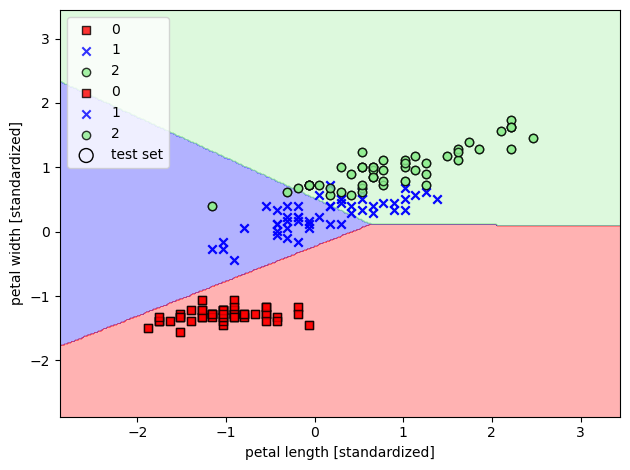

In [35]:
X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
#Although the perceptron rule offers a nice and easy-going introduction to machine 
#learning algorithms for classification, its biggest disadvantage is that it never 
#converges if the classes are not perfectly linearly separable.
 